## Predicting Stock Prices using Geometric Brownian Motion and Monte Carlo Algorithm
### Author: LUKE CHUGH

<ipython-input-8-5168ff1a81f4>:40: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  simulation_df[x] = price_series


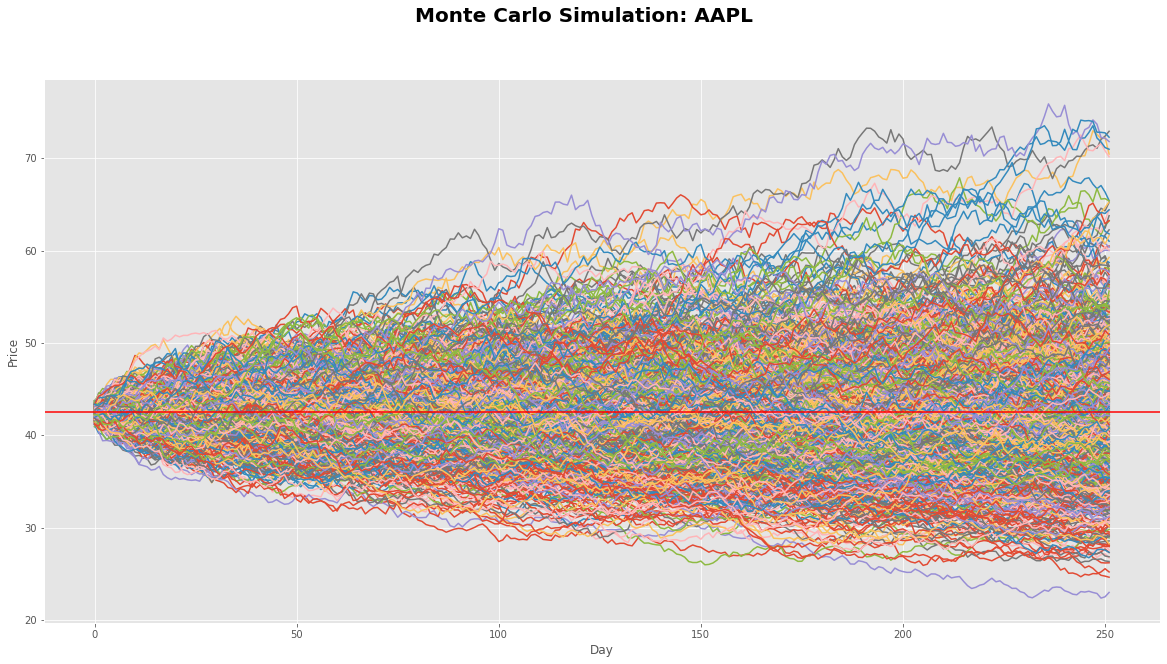

In [8]:
import pandas_datareader.data as web
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

style.use('ggplot')

start = dt.datetime(2017, 1, 3)
end = dt.datetime(2017, 11, 20)

prices = web.DataReader('AAPL', 'yahoo', start, end)['Close']
returns = prices.pct_change()

last_price = prices[-1]

#Number of Simulations
num_simulations = 1000
num_days = 252

simulation_df = pd.DataFrame()

for x in range(num_simulations):
    count = 0
    daily_vol = returns.std()
    
    price_series = []
    
    price = last_price * (1 + np.random.normal(0, daily_vol))
    price_series.append(price)
    
    for y in range(num_days):
        if count == 251:
            break
        price = price_series[count] * (1 + np.random.normal(0, daily_vol))
        price_series.append(price)
        count += 1
    
    simulation_df[x] = price_series
    
fig = plt.figure(figsize=(20,10))
fig.suptitle('Monte Carlo Simulation: AAPL',size=20,fontweight='bold')
plt.plot(simulation_df)
plt.axhline(y = last_price, color = 'r', linestyle = '-')
plt.xlabel('Day')
plt.ylabel('Price')
plt.show()